In [1]:
# Notebook hücresinde bu şekilde kullanın:

# 1. sampling modülü
from stats_for_mols.sampling import DataSplitter

# 2. performance modülü (başındaki noktayı kaldırdık)
from stats_for_mols.performance.metrics import MetricCalculator

# 3. statistics modülü (başındaki noktayı kaldırdık)
from stats_for_mols.statistics import StatisticalValidator

# 4. visualization modülü (başındaki noktaları kaldırdık)
from stats_for_mols.visualization.plots import plot_mcsim, plot_simultaneous_ci
from stats_for_mols.visualization.metrics_plot import MetricVisualizer
from stats_for_mols.visualization.diagnostics import plot_target_distribution

/nfs/home/myuecel3/stats_for_mols/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

In [3]:
# Create synthetic data
X, y = make_regression(n_samples=1000, n_features=1024, n_informative=50, noise=0.5, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'fp_{i}' for i in range(1024)])
df['pIC50'] = y  # Target variable (e.g., pIC50)

# Add dummy SMILES column to demonstrate API compatibility
# (In real usage, you would load a CSV with real SMILES)
df['SMILES'] = ["C" * np.random.randint(1, 10) for _ in range(1000)]

print(f"Dataset Shape: {df.shape}")
print("Target Range:", df['pIC50'].min(), "to", df['pIC50'].max())

Dataset Shape: (1000, 1026)
Target Range: -1263.1601714664157 to 1587.2723406075672


In [4]:
df

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_1016,fp_1017,fp_1018,fp_1019,fp_1020,fp_1021,fp_1022,fp_1023,pIC50,SMILES
0,-0.114958,1.614876,0.551286,-0.370972,-0.835486,-1.099678,0.515969,-1.503128,-0.448404,-0.000124,...,-0.781389,-0.025642,-0.125978,-0.123967,2.000985,0.397158,0.945332,-0.275632,-138.721496,CCCCCCC
1,1.777760,-0.090447,0.349614,-0.766061,2.033815,0.359289,-1.036702,1.656736,-0.657291,-0.732936,...,-0.649655,0.440154,-1.713434,0.747838,-0.003294,-0.877086,0.638362,0.313310,199.770643,CCCC
2,-0.482900,0.434966,1.099815,-0.955908,-0.830135,-2.556450,-0.627791,0.310040,-0.434762,1.765216,...,1.680958,1.821811,-0.389263,-0.893448,-0.150977,-0.000124,-1.161102,0.535172,282.586615,CCCCCCCC
3,-1.219372,-0.516123,-0.534801,-0.243840,2.344365,-0.690174,-1.020462,-0.185899,1.707931,-0.686005,...,-0.943705,1.125504,-0.267213,0.294642,-0.671970,2.190178,0.075413,1.105140,534.402284,CCCCC
4,-2.186050,0.364121,-1.363076,0.794470,0.425781,-0.870680,0.269375,1.868598,0.493445,0.563352,...,-0.500480,0.656143,-0.387007,0.238943,1.467580,-0.031098,-2.244584,1.425249,473.105319,CCCCCCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.697596,-0.278238,-0.233103,0.016852,-0.439171,0.212191,1.092187,-1.193002,-0.127898,-1.714488,...,0.563204,2.617874,0.546653,-0.383534,1.181627,0.906035,-0.523323,0.656813,-283.598260,CCCCCCCC
996,0.913514,1.223531,1.021744,0.227308,0.484245,-2.325446,-0.476284,-1.234002,-0.325813,1.377631,...,-0.967035,-0.330767,-0.787126,-1.505884,0.432188,2.125706,1.483487,0.272766,393.021592,C
997,0.657335,-0.040648,0.435436,0.450115,-1.307267,0.360917,1.413052,-0.746729,-0.233024,-0.469928,...,-1.029926,-0.011469,-0.161500,-0.272802,0.882053,-1.991220,-0.401510,-1.112194,164.195300,CCCCCCCCC
998,2.121569,0.797625,-0.510635,-0.282954,0.519578,-1.781741,1.007190,0.565708,-0.657453,1.110612,...,-1.235413,1.150238,1.423886,1.275717,-0.969152,0.745479,-0.590782,-2.602258,-177.951309,CCCCCCC


Selected Strategy: light_nested_cv
Splits: 5, Repeats: 5
Using light_nested_cv with 5 splits and 5 repeats.
Total folds available: 25


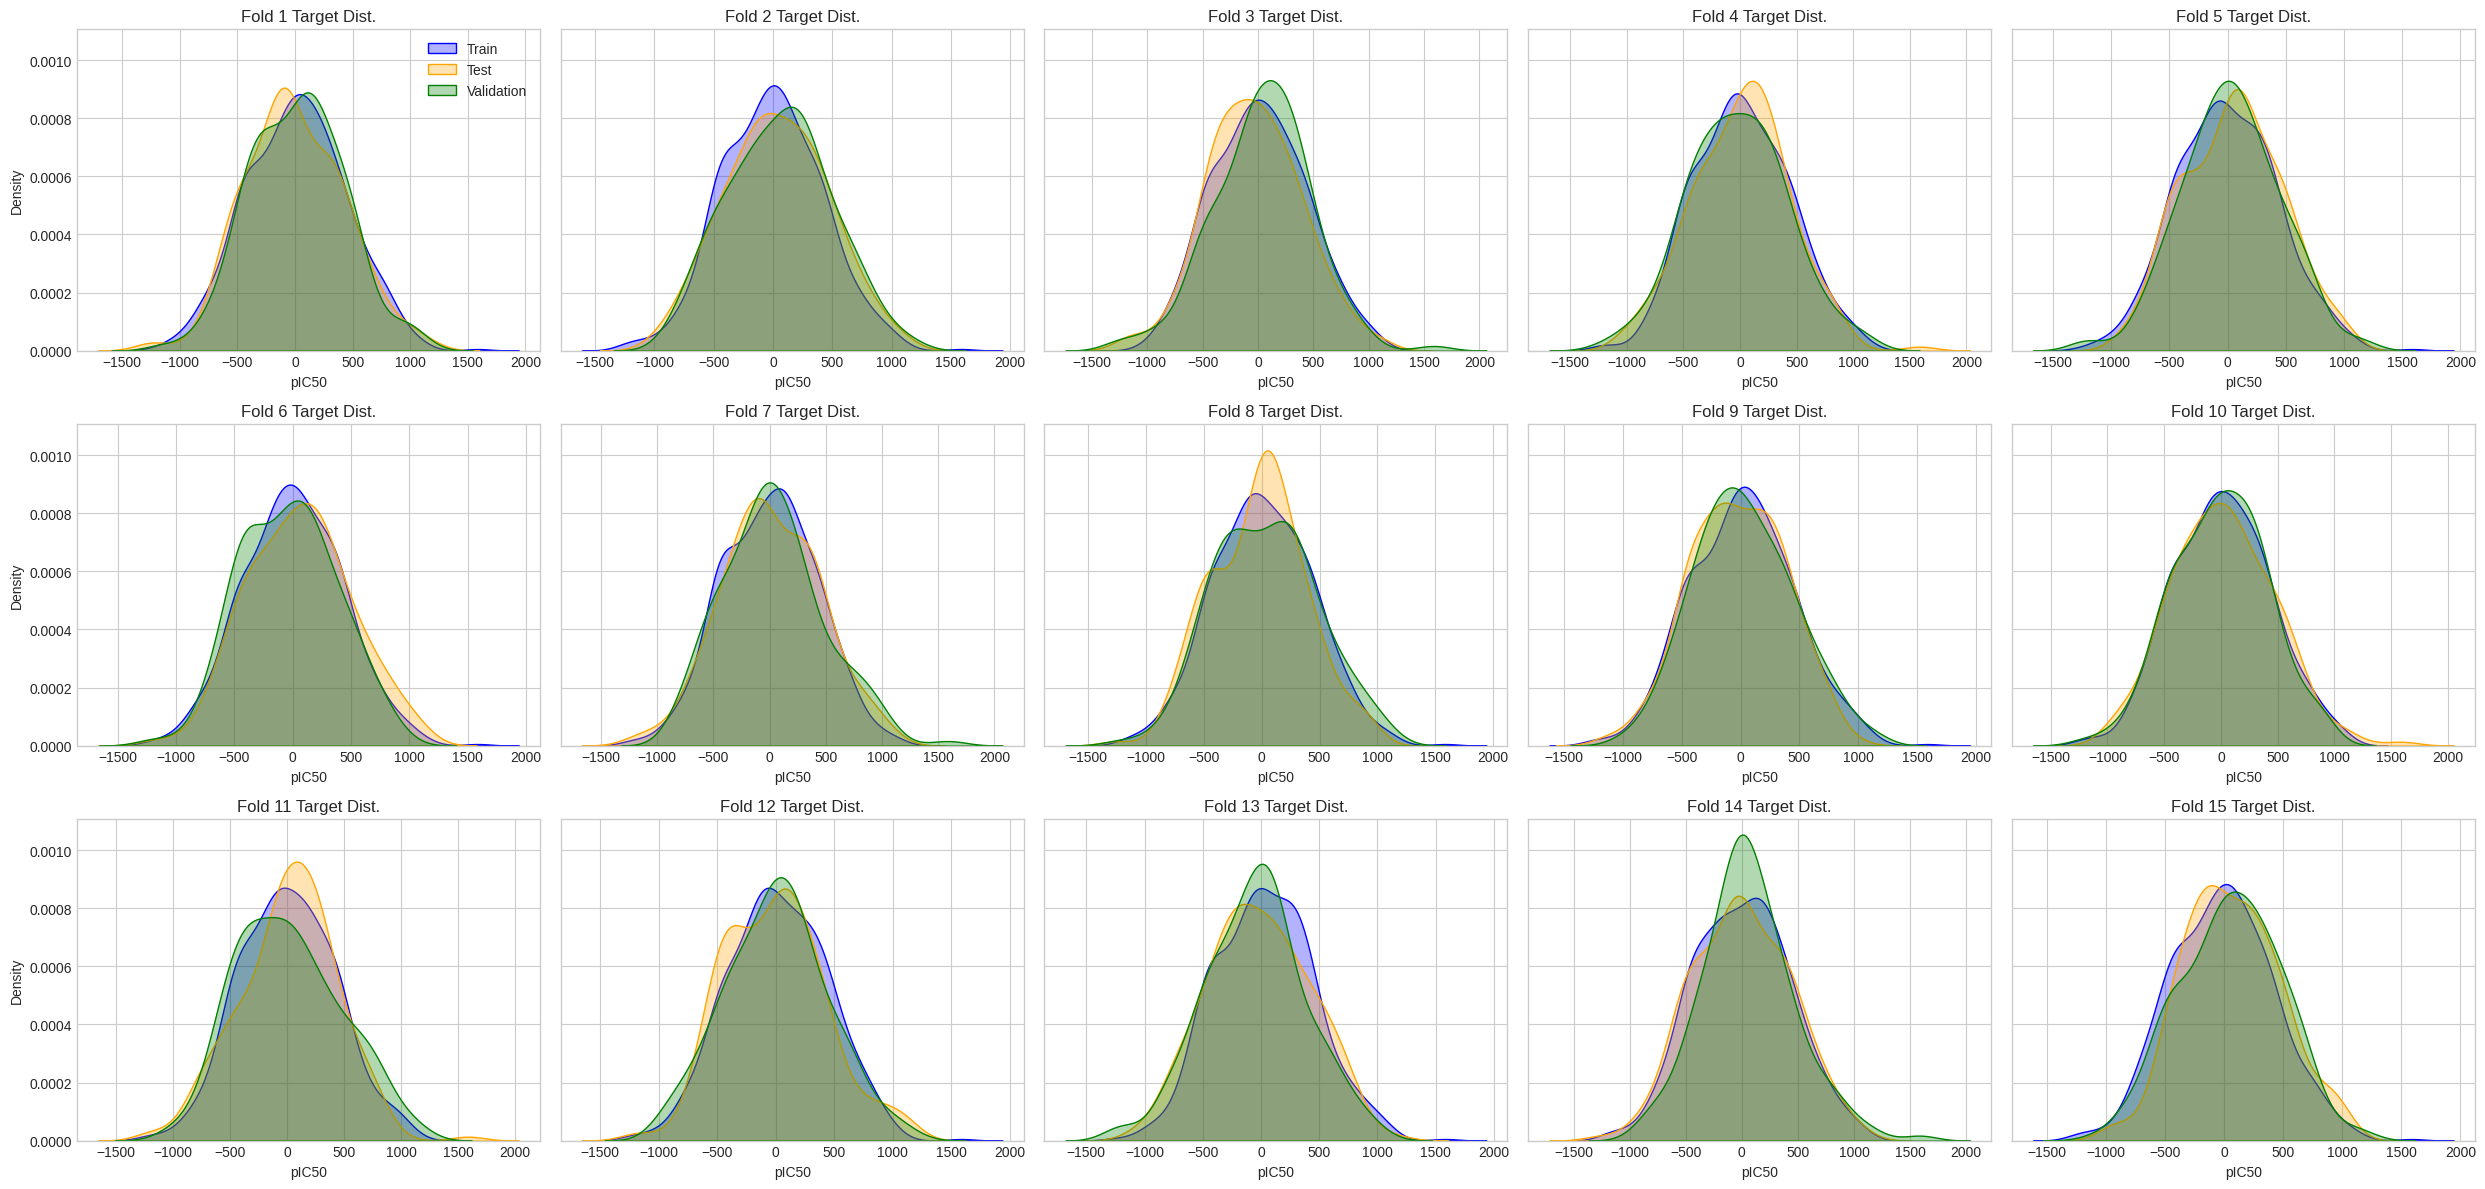

In [6]:

splitter = DataSplitter(df, target_col='pIC50', split_type='random', task_type='regression')
splitter.config['method_name'] = 'light_nested_cv' 
print(f"Selected Strategy: {splitter.config['method_name']}")
print(f"Splits: {splitter.config['n_splits']}, Repeats: {splitter.config['n_repeats']}")

# Diagnostic Plot: Check if target distribution is preserved across folds
plot_target_distribution(df, 'pIC50', splitter, n_folds_to_plot = 15)
plt.show()

In [8]:
models = {
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    'XGBoost': GradientBoostingRegressor(n_estimators=50, random_state=42)
}

results_list = []
# We will store raw predictions for the FIRST fold to visualize later
# Structure: {'ModelName': {'Train': {'y_true':..., 'y_pred':...}, 'Test': ...}}
viz_data = {} 

print(f"Starting Training using {splitter.config['method_name']}...")

# 2. The Loop
for i, split_data in enumerate(splitter.split()):
    
    # --- A. Dynamic Unpacking (Handle Nested vs Standard CV) ---
    val_idx = None
    if len(split_data) == 3:
        train_idx, val_idx, test_idx = split_data
    else:
        train_idx, test_idx = split_data
    
    # --- B. Create Data Subsets ---
    # We drop non-feature columns. Adjust 'pIC50', 'SMILES' if your col names differ.
    features = df.columns.difference(['pIC50', 'SMILES'])
    
    X_train, y_train = df.iloc[train_idx][features], df.iloc[train_idx]['pIC50']
    X_test, y_test   = df.iloc[test_idx][features],  df.iloc[test_idx]['pIC50']
    
    if val_idx is not None:
        X_val, y_val = df.iloc[val_idx][features], df.iloc[val_idx]['pIC50']
    
    # --- C. Model Training & Evaluation ---
    for name, model in models.items():
        # 1. Train
        model.fit(X_train, y_train)
        
        # 2. Predict & Calculate Metrics for ALL sets
        fold_res = {'model': name, 'fold': i}
        
        # Helper to process a specific set (Train/Val/Test)
        def process_set(X, y, set_name):
            if len(X) == 0: return
            pred = model.predict(X)
            
            # Calculate Metrics
            metrics = MetricCalculator.get_regression_metrics(y.values, pred, top_k_fractions=[0.1])
            
            # Save with Prefix (e.g., 'Test_MAE', 'Train_R2')
            for k, v in metrics.items():
                fold_res[f"{set_name}_{k}"] = v
            
            # Store Raw Predictions (Only for Fold 0 to save memory for plots)
            if i == 0:
                if name not in viz_data: viz_data[name] = {}
                viz_data[name][set_name] = {'y_true': y.values, 'y_pred': pred}

        # Process Train
        process_set(X_train, y_train, "Train")
        
        # Process Val (if exists)
        if val_idx is not None:
            process_set(X_val, y_val, "Validation")
            
        # Process Test
        process_set(X_test, y_test, "Test")
        
        results_list.append(fold_res)

# 3. Convert Results to DataFrame
results_df = pd.DataFrame(results_list)

# Reorder columns to put Model/Fold first, then Test metrics, then others
cols = ['model', 'fold'] + [c for c in results_df.columns if c.startswith('Test_')] + \
       [c for c in results_df.columns if c not in ['model', 'fold'] and not c.startswith('Test_')]
results_df = results_df[cols]

print("Training Complete.")
results_df.head()

Starting Training using light_nested_cv...
Using light_nested_cv with 5 splits and 5 repeats.
Training Complete.


,model,fold,Test_MAE,Test_RMSE,Test_R2,Test_Pearson_Global,Test_Spearman_Global,Test_Kendall_Global,Test_Spearman_Top10%,Test_Kendall_Top10%,...,Train_Spearman_Top10%,Train_Kendall_Top10%,Validation_MAE,Validation_RMSE,Validation_R2,Validation_Pearson_Global,Validation_Spearman_Global,Validation_Kendall_Global,Validation_Spearman_Top10%,Validation_Kendall_Top10%
0,DecisionTree,0,472.103071,571.393462,-0.577869,0.161061,0.127889,0.083080,0.162327,0.112620,...,1.000000,1.000000,437.590128,569.279703,-0.917122,0.112757,0.154467,0.107102,-0.488595,-0.326363
1,RandomForest,0,318.423104,406.793555,0.200260,0.574627,0.580869,0.410452,0.129323,0.073684,...,0.801007,0.599206,298.167193,366.934994,0.203517,0.535035,0.532626,0.374686,-0.055882,-0.033333
2,XGBoost,0,263.508711,338.817370,0.445206,0.761864,0.751679,0.561307,0.461654,0.336842,...,0.790293,0.592262,253.580243,314.277833,0.415714,0.719687,0.701761,0.514308,0.179412,0.150000
3,DecisionTree,1,452.848766,560.289585,-0.575906,0.165918,0.156443,0.105004,0.360286,0.248022,...,1.000000,1.000000,436.371310,535.462619,-0.702098,0.145371,0.156530,0.100780,-0.332352,-0.263890
4,RandomForest,1,327.518461,402.692555,0.185948,0.509069,0.499521,0.347437,-0.601504,-0.431579,...,0.832005,0.652778,278.468643,347.556911,0.282903,0.623966,0.605464,0.435377,0.061765,0.050000


In [9]:
results_df.describe()
results_df

,model,fold,Test_MAE,Test_RMSE,Test_R2,Test_Pearson_Global,Test_Spearman_Global,Test_Kendall_Global,Test_Spearman_Top10%,Test_Kendall_Top10%,...,Train_Spearman_Top10%,Train_Kendall_Top10%,Validation_MAE,Validation_RMSE,Validation_R2,Validation_Pearson_Global,Validation_Spearman_Global,Validation_Kendall_Global,Validation_Spearman_Top10%,Validation_Kendall_Top10%
0,DecisionTree,0,472.103071,571.393462,-0.577869,0.161061,0.127889,0.083080,0.162327,0.112620,...,1.000000,1.000000,437.590128,569.279703,-0.917122,0.112757,0.154467,0.107102,-0.488595,-0.326363
1,RandomForest,0,318.423104,406.793555,0.200260,0.574627,0.580869,0.410452,0.129323,0.073684,...,0.801007,0.599206,298.167193,366.934994,0.203517,0.535035,0.532626,0.374686,-0.055882,-0.033333
2,XGBoost,0,263.508711,338.817370,0.445206,0.761864,0.751679,0.561307,0.461654,0.336842,...,0.790293,0.592262,253.580243,314.277833,0.415714,0.719687,0.701761,0.514308,0.179412,0.150000
3,DecisionTree,1,452.848766,560.289585,-0.575906,0.165918,0.156443,0.105004,0.360286,0.248022,...,1.000000,1.000000,436.371310,535.462619,-0.702098,0.145371,0.156530,0.100780,-0.332352,-0.263890
4,RandomForest,1,327.518461,402.692555,0.185948,0.509069,0.499521,0.347437,-0.601504,-0.431579,...,0.832005,0.652778,278.468643,347.556911,0.282903,0.623966,0.605464,0.435377,0.061765,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,RandomForest,23,303.671091,373.684223,0.194767,0.494622,0.452692,0.312663,0.036090,0.031579,...,0.822161,0.632937,319.968676,397.865490,0.159921,0.436808,0.486081,0.328145,0.279412,0.216667
71,XGBoost,23,264.703364,331.430597,0.366572,0.668413,0.636302,0.455578,0.375940,0.273684,...,0.779670,0.579365,256.243123,327.928780,0.429302,0.717650,0.726913,0.527830,0.191176,0.100000
72,DecisionTree,24,449.051749,548.456190,-0.721326,0.166031,0.147057,0.098199,0.251412,0.185682,...,1.000000,1.000000,425.236640,533.427664,-0.472030,0.251342,0.273304,0.182792,0.655860,0.464172
73,RandomForest,24,301.627498,377.265233,0.185534,0.486971,0.460381,0.316784,-0.108271,-0.042105,...,0.847253,0.675595,315.927687,404.658396,0.152884,0.428940,0.417960,0.290409,-0.164706,-0.100000


In [15]:
results_df.columns[2:]

Index(['Test_MAE', 'Test_RMSE', 'Test_R2', 'Test_Pearson_Global',
       'Test_Spearman_Global', 'Test_Kendall_Global', 'Test_Spearman_Top10%',
       'Test_Kendall_Top10%', 'Train_MAE', 'Train_RMSE', 'Train_R2',
       'Train_Pearson_Global', 'Train_Spearman_Global', 'Train_Kendall_Global',
       'Train_Spearman_Top10%', 'Train_Kendall_Top10%', 'Validation_MAE',
       'Validation_RMSE', 'Validation_R2', 'Validation_Pearson_Global',
       'Validation_Spearman_Global', 'Validation_Kendall_Global',
       'Validation_Spearman_Top10%', 'Validation_Kendall_Top10%'],
      dtype='object')

In [24]:
# Initialize Validator
validator = StatisticalValidator(results_df, model_col='model', metric_col=['Test_MAE'], subject_col='fold')

# Run Validation
stats_report = validator.validate()
print(stats_report['Test_MAE']['assumptions'])
print(f"--- Statistical Report ---")
print(f"Assumptions Met: {stats_report['Test_MAE']['assumptions']['valid_parametric']}")
print(f"Test Used: {stats_report['Test_MAE']['global_test']}")
print(f"Global p-value: {stats_report['Test_MAE']['global_pvalue']:.2e}")

# If significant, show pairwise comparisons
if stats_report['Test_MAE']['global_pvalue'] < 0.05:
    print("\nPairwise Comparisons (Differences):")
    display(stats_report['Test_MAE']['pairwise_results'])


Validating Metric: Test_MAE
Assumptions met (or forced). Running Parametric Tests (Repeated Measures ANOVA).
{'normality': np.True_, 'normality_p_min': np.float64(0.7243341089892643), 'sphericity': False, 'sphericity_p': np.float64(1.9932149141537593e-06), 'valid_parametric': True}
--- Statistical Report ---
Assumptions Met: True
Test Used: Repeated Measures ANOVA
Global p-value: 3.90e-44

Pairwise Comparisons (Differences):


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,DecisionTree,RandomForest,439.866454,309.726864,130.139590,5.046863,25.786234,0.000000e+00,6.825069
1,DecisionTree,XGBoost,439.866454,267.584488,172.281967,5.046863,34.136445,0.000000e+00,9.192322
2,RandomForest,XGBoost,309.726864,267.584488,42.142376,5.046863,8.350212,1.019085e-11,2.559785


DEBUG: Using p-value column 'p-tukey' for significance testing.


/nfs/home/myuecel3/stats_for_mols/stats_for_mols/visualization/plots.py:174: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = p_matrix.applymap(get_star)


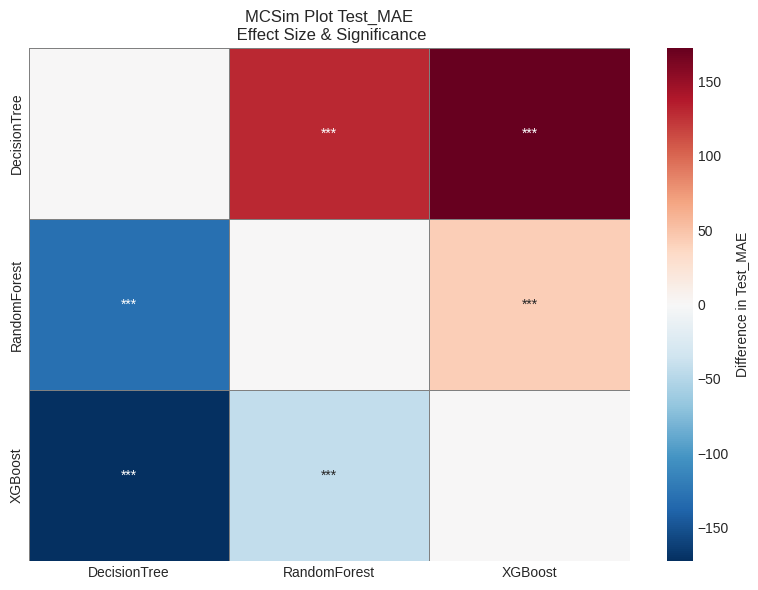

DEBUG: Using p-value column 'p-tukey' for significance testing.
DEBUG: Best Model identified as 'XGBoost' based on Test_MAE


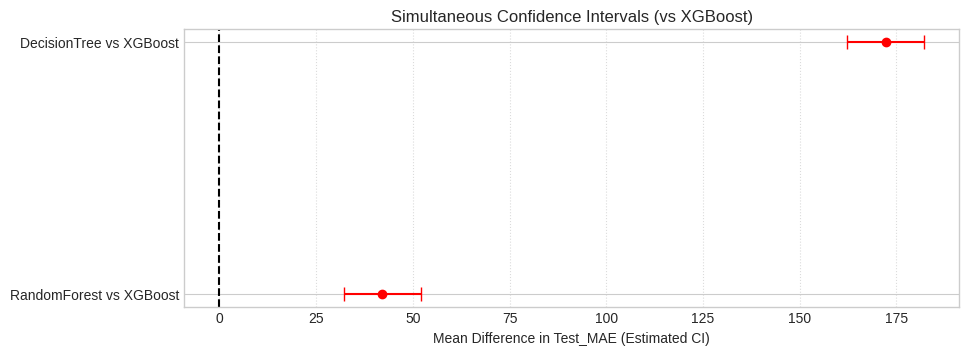

In [28]:
# 1. MCSim Plot (Multiple Comparisons Similarity)
# Shows which models are statistically similar (grey/white) vs different (colored)
# Stars indicate significance level (* p<0.05)
plot_mcsim(stats_report['Test_MAE']['pairwise_results'], metric_name='Test_MAE')
plt.show()

# 2. Simultaneous Confidence Intervals
# Shows the 95% Confidence Interval of the difference between the Best Model and others.
# If the interval does not cross zero, the difference is significant.
plot_simultaneous_ci(stats_report['Test_MAE']['pairwise_results'], metric_name='Test_MAE')
plt.show()

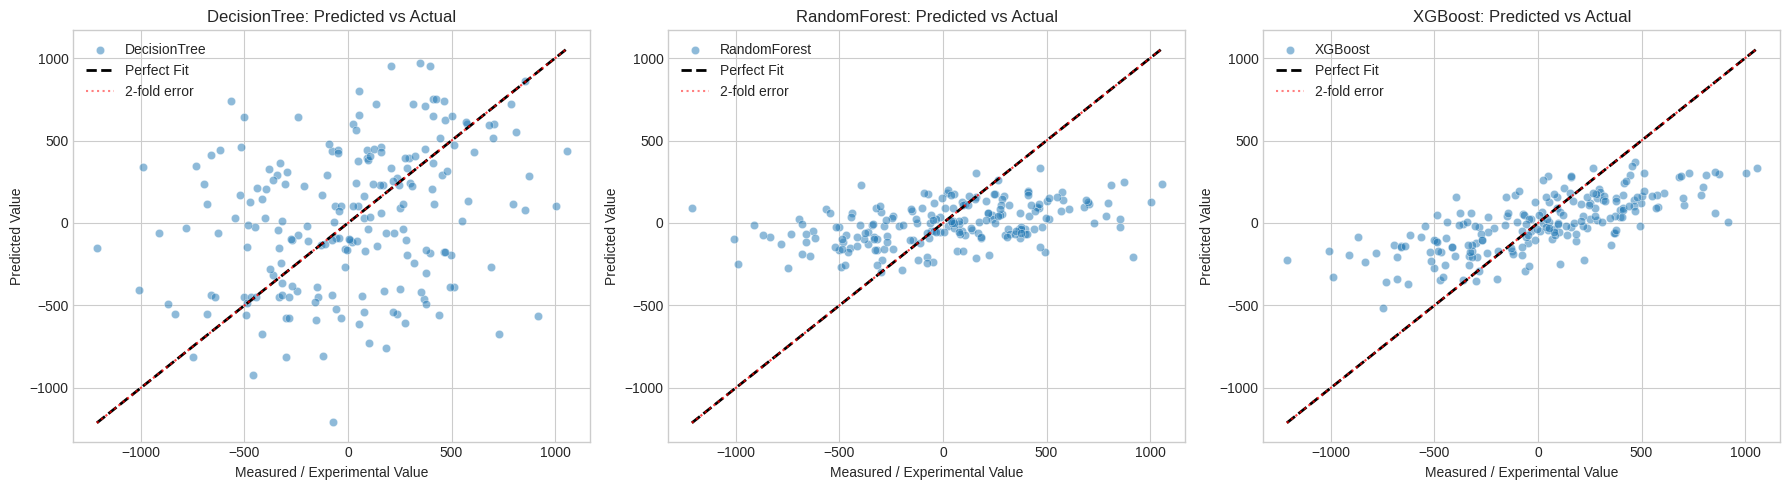

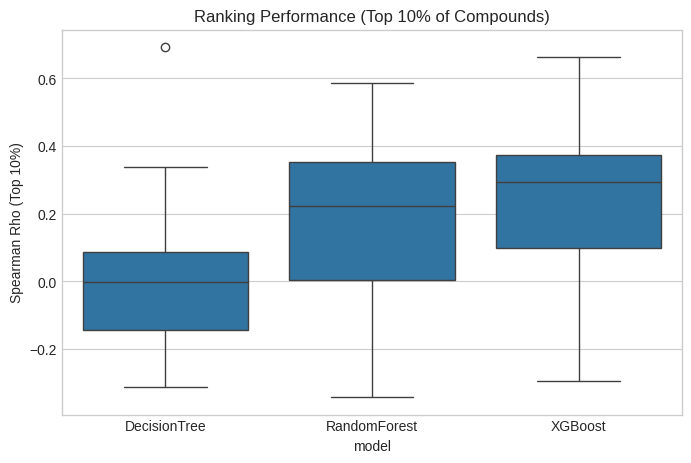

In [9]:
# Visualize Raw Predictions for the first fold
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, name in enumerate(models.keys()):
    subset = pd.concat(raw_predictions)
    subset = subset[subset['model'] == name]
    
    # Use our MetricVisualizer to draw the identity line and 2-fold error margins
    MetricVisualizer.plot_regression_scatter(subset['y_true'], subset['y_pred'], model_name=name, ax=axes[idx])

plt.tight_layout()
plt.show()

# Check Ranking Performance (Spearman Top 10%)
# This tells us: "How good is the model at ranking the best compounds?"
plt.figure(figsize=(8, 5))
import seaborn as sns
sns.boxplot(data=results_df, x='model', y='Spearman_Top10%')
plt.title("Ranking Performance (Top 10% of Compounds)")
plt.ylabel("Spearman Rho (Top 10%)")
plt.show()